In [1]:
#import libraries
import pandas as pd
import matplotlib.pyplot as plt

This is a Women’s Clothing E-Commerce dataset revolving around the reviews written by customers. 

This dataset includes 23486 rows and 10 feature variables. Each row corresponds to a customer review, and includes the variables:
<ul>
     <li>Clothing ID: Integer Categorical variable that refers to the specific piece being reviewed.</li>
     <li>Age: Positive Integer variable of the reviewers age.</li>
     <li>Title: String variable for the title of the review.</li>
     <li>Review Text: String variable for the review body.</li>
     <li>Rating: Positive Ordinal Integer variable for the product score granted by the customer from 1 Worst, to 5 Best.</li>
     <li>Recommended IND: Binary variable stating where the customer recommends the product where 1 is recommended, 0 is not recommended.</li>
     <li>Positive Feedback Count: Positive Integer documenting the number of other customers who found this review positive.
</li>
     <li>Division Name: Categorical name of the product high level division.</li>
     <li>Department Name: Categorical name of the product department name.</li>
     <li>Class Name: Categorical name of the product class name.</li>
</ul>


Steps of the project as follows:
 <ol>
   <li>Load Dataset</li>
   <li>Explore Dataset</li>
   <li>Cleaning Dataset</li>
   <li>Analysis and Visualization</li>
  </ol>

# 1.Load Dataset

In [2]:
#load data using panda library
df=pd.read_csv("Womens Clothing E-Commerce Reviews.csv")

# 2.Explore dataset

In [3]:
#display data
df.head()

,Unnamed: 0,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
0,0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates
1,1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses
2,2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses
3,3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants
4,4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23486 entries, 0 to 23485
Data columns (total 11 columns):
Unnamed: 0                 23486 non-null int64
Clothing ID                23486 non-null int64
Age                        23486 non-null int64
Title                      19676 non-null object
Review Text                22641 non-null object
Rating                     23486 non-null int64
Recommended IND            23486 non-null int64
Positive Feedback Count    23486 non-null int64
Division Name              23472 non-null object
Department Name            23472 non-null object
Class Name                 23472 non-null object
dtypes: int64(6), object(5)
memory usage: 2.0+ MB


# 3.Cleaning Dataset

In this step I drop unnecessary columns and check the missing values

In [5]:
#drop unnecessary columns for analysis
df.drop(columns=["Unnamed: 0","Title","Review Text","Positive Feedback Count"],inplace=True)

In [6]:
#display data after I drop the columns
df.head()

,Clothing ID,Age,Rating,Recommended IND,Division Name,Department Name,Class Name
0,767,33,4,1,Initmates,Intimate,Intimates
1,1080,34,5,1,General,Dresses,Dresses
2,1077,60,3,0,General,Dresses,Dresses
3,1049,50,5,1,General Petite,Bottoms,Pants
4,847,47,5,1,General,Tops,Blouses


In [7]:
#check the null values in each column
df.isnull().sum()

Clothing ID         0
Age                 0
Rating              0
Recommended IND     0
Division Name      14
Department Name    14
Class Name         14
dtype: int64

In [8]:
#create data frame for data which has missing values in  Division Name column
null_values=df[df["Division Name"].isnull()]

In [9]:
null_values

,Clothing ID,Age,Rating,Recommended IND,Division Name,Department Name,Class Name
9444,72,25,5,1,NaN,NaN,NaN
13767,492,23,5,1,NaN,NaN,NaN
13768,492,49,5,1,NaN,NaN,NaN
13787,492,48,5,1,NaN,NaN,NaN
16216,152,36,5,1,NaN,NaN,NaN
16221,152,37,5,1,NaN,NaN,NaN
16223,152,39,5,1,NaN,NaN,NaN
18626,184,34,5,1,NaN,NaN,NaN
18671,184,54,5,1,NaN,NaN,NaN
20088,772,50,5,1,NaN,NaN,NaN


In [10]:
#check the shape of data which has missing values
null_values.shape

(14, 7)

In [11]:
"""
based on above table we can notice the three columns(Division Name,Department Name,Class Name)
has missing values,and we have just 14 rows have missing values so,I descide to drop these rows from original data
"""
df.drop(index=null_values.index,axis=0,inplace=True)

In [12]:
#test for check if we still have missing values
df.isnull().sum()

Clothing ID        0
Age                0
Rating             0
Recommended IND    0
Division Name      0
Department Name    0
Class Name         0
dtype: int64

# 4.Analysis and Visualization

<h3>Q1:What are the top five products recommended by reviewers for other people?</h3>

In [13]:
#choose the products which are recommended for other people
df_recommend=df[df["Recommended IND"]==1]

In [14]:
#group by clothing Id and sorting values of Recommended IND
product_id=df_recommend.groupby("Clothing ID")["Recommended IND"].count().sort_values(ascending=False)

In [15]:
#creat data frame for product ID and Recommended Count
product_id=pd.DataFrame({"Clothing ID":product_id.index,"Recommended Count":product_id.values})

In [16]:
#create new datafram to the products that customers recommend
recommend_id=product_id[0:5]

In [17]:
recommend_id

,Clothing ID,Recommended Count
0,1078,841
1,862,661
2,1094,621
3,1081,494
4,872,478


In [18]:
#create list to the products that customers recommend
Product_id=list()
for ID in recommend_id["Clothing ID"]:
    Product_id.append("Product {}".format(ID))

In [19]:
#the products that customers recommend
Product_id

['Product 1078', 'Product 862', 'Product 1094', 'Product 1081', 'Product 872']

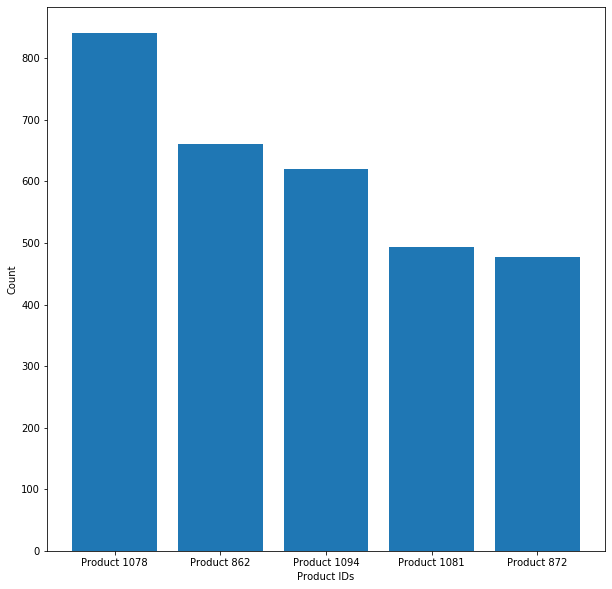

In [20]:
#plot the products that customers recommend
plt.figure(figsize=(10,10))
plt.bar(Product_id,recommend_id["Recommended Count"])
plt.xlabel("Product IDs")
plt.ylabel("Count")
plt.show()

In [21]:
class_name_pro=df[df["Clothing ID"].isin(recommend_id["Clothing ID"])]

In [22]:
class_name_pro.groupby("Clothing ID")["Department Name"].value_counts().sort_values(ascending=False)

Clothing ID  Department Name
1078         Dresses            1024
862          Tops                806
1094         Dresses             756
1081         Dresses             582
872          Tops                545
Name: Department Name, dtype: int64

In [23]:
top5_department=class_name_pro.groupby("Clothing ID")["Department Name"].value_counts().sort_values(ascending=False)

In [24]:
top5_department=pd.DataFrame(top5_department)

In [25]:
top5_department.rename(columns={'Department Name':'count'}, inplace=True)

In [26]:
top5_department

,,count
Clothing ID,Department Name,
1078,Dresses,1024
862,Tops,806
1094,Dresses,756
1081,Dresses,582
872,Tops,545


We can see the top 5 products which have ids 1078,862,1094,1081 and 872
and These products belong to Dresses and Tops.

<h3>Q2:What are the class names of products have most reviewed?</h3>

In [27]:
df["Class Name"].value_counts()

Dresses           6319
Knits             4843
Blouses           3097
Sweaters          1428
Pants             1388
Jeans             1147
Fine gauge        1100
Skirts             945
Jackets            704
Lounge             691
Swim               350
Outerwear          328
Shorts             317
Sleep              228
Legwear            165
Intimates          154
Layering           146
Trend              119
Casual bottoms       2
Chemises             1
Name: Class Name, dtype: int64

In [28]:
count_class=pd.Series(df["Class Name"].value_counts())

In [29]:
count_class.get_values()

array([6319, 4843, 3097, 1428, 1388, 1147, 1100,  945,  704,  691,  350,
        328,  317,  228,  165,  154,  146,  119,    2,    1], dtype=int64)

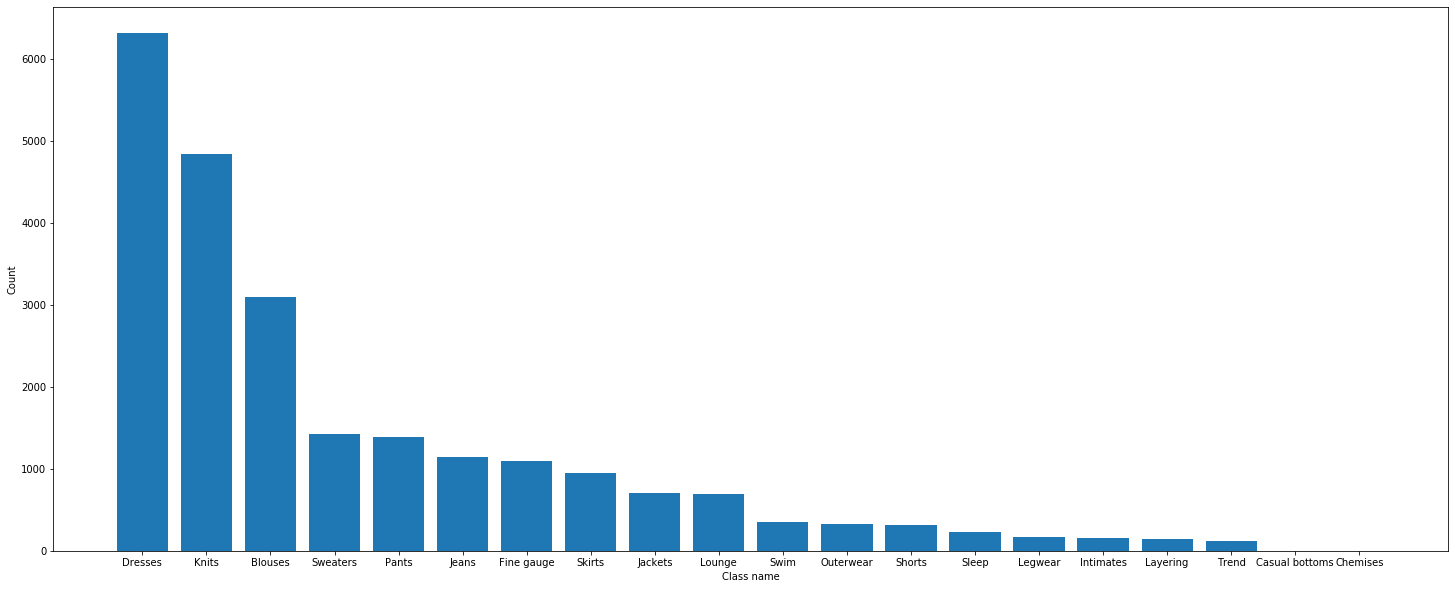

In [30]:
plt.figure(figsize = (25,10))
plt.bar(count_class.index,count_class.get_values())
plt.xlabel("Class name")
plt.ylabel("Count")
plt.show()

<h3>Q3:What are the age groups for women that most reviewed products ?</h3>

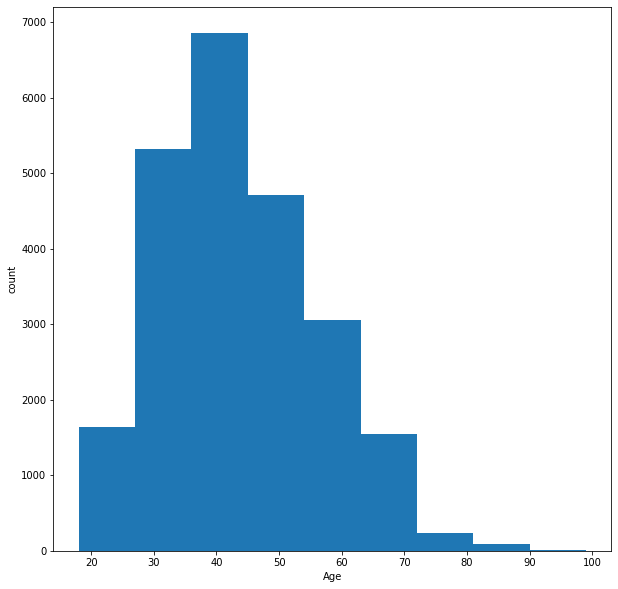

In [31]:
plt.figure(figsize=(10,10))
plt.hist(df["Age"],bins=9)
plt.xlabel("Age")
plt.ylabel("count")
plt.show()